<a href="https://colab.research.google.com/github/letrandongquan/Hoc-may-va-ung-dung/blob/main/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.1 Biến đổi cường độ ảnh ( image inverse transformation)

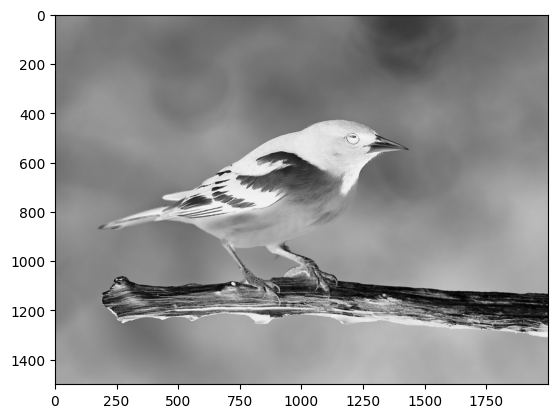

In [10]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt


img = Image.open('bird.png').convert('L')
im_1 = np.asarray(img)
im_2 = 255 - im_1
new_img = Image.fromarray(im_2)
img.show()
plt.imshow(im_2, cmap='gray')
plt.show()

In [6]:
from google.colab import files
uploaded = files.upload()


Saving bird.png to bird.png


1.2 thay đổi chất lượng ảnh với power law (Gamma- Correction)

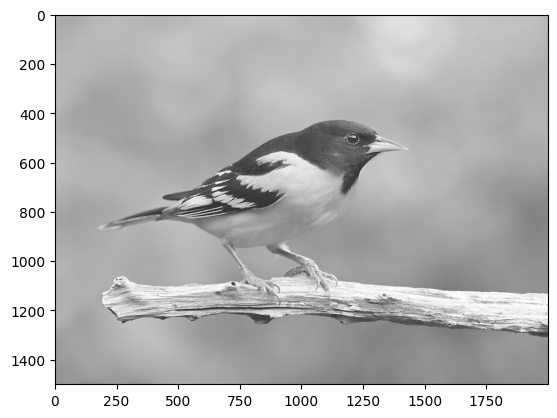

In [15]:
from PIL import Image
import math
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

img = Image.open('bird.png').convert('L')
im_1 = np.asarray(img)

gamma = 5
b1 = im_1.astype(float)
b2 = np.max(b1)
b3 = b1 / b2
b2 = np.log(b3 + 1e-5) * gamma
c1 = np.clip(c, 0, 255).astype(np.uint8)
d = Image.fromarray(c1)

img.show()
d.show()
plt.imshow(d, cmap='gray')
plt.show()




1.3 thay đổi cường độ điểm ảnh với Log Transformation

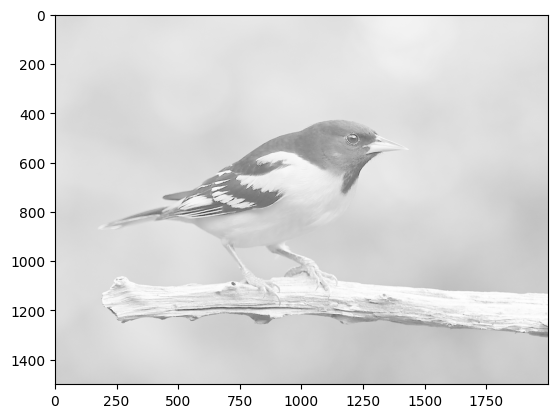

In [16]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
img = Image.open('bird.png').convert('L')
im_1 = np.asarray(img)
b1 = im_1.astype(float)
b2 = np.max(b1)
c = (128.0 * np.log(1 + b1)) / np.log(1 + b2)
cl = np.clip(c, 0, 255).astype(np.uint8)
d = Image.fromarray(cl)
img.show()
d.show()

plt.imshow(d, cmap='gray')
plt.show()


1.4 histogram equalization

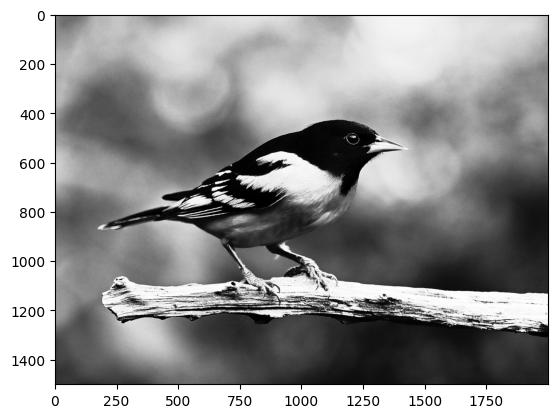

In [18]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

img = Image.open('bird.png').convert('L')
im1 = np.asarray(img)
bl = im1.flatten()
hist, bins = np.histogram(bl, 256, [0, 255])
cdf = hist.cumsum()
cdf_m = np.ma.masked_equal(cdf, 0)
num_cdf_m = (cdf_m - cdf_m.min()) * 255
den_cdf_m = (cdf_m.max() - cdf_m.min())
cdf_m = num_cdf_m / den_cdf_m
cdf = np.ma.filled(cdf_m, 0).astype('uint8')
im2 = cdf[bl]
im3 = np.reshape(im2, im1.shape)
im4 = Image.fromarray(im3.astype(np.uint8))
img.show()
im4.show()
plt.imshow(im4, cmap='gray')
plt.show()


1.5 thay đổi ảnh với contrast Stretching

0 255


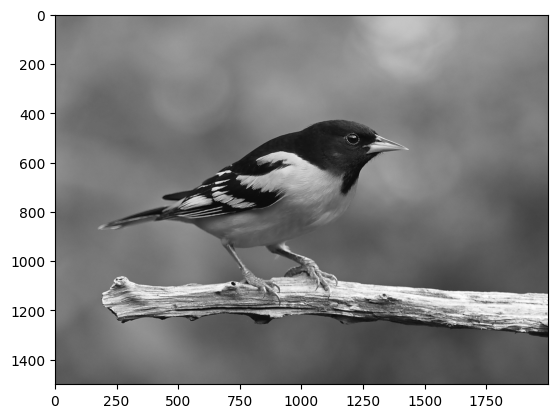

In [21]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
img = Image.open('bird.png').convert('L')
im1 = np.asarray(img)
b = im1.max()
a = im1.min()
print(a, b)
c = im1.astype(float)
im2 = 255 * (c - a) / (b - a)
im3 = Image.fromarray(im2)
img.show()
im3.show()
plt.imshow(im3, cmap='gray')
plt.show()

1.6 Biến Đổi Fourier

1.6.1 Biến đổi ảnh với Fast Fourier

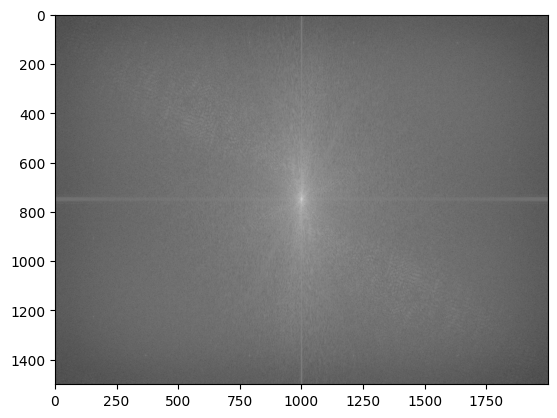

In [24]:
from PIL import Image
import math
import scipy.fftpack
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
img = Image.open('bird.png').convert('L')
im1 = np.asarray(img)
c = abs(scipy.fftpack.fft2(im1))
d = scipy.fftpack.fftshift(c)
d = np.log(1 + d)
d = 255 * d / np.max(d)
d = d.astype(np.uint8)
im3 = Image.fromarray(d)
img.show()
im3.show()
plt.imshow(im3, cmap='gray')
plt.show()



1.6.2 Lọc ảnh trong miền tần suất

Butterworth Lowpass Filter


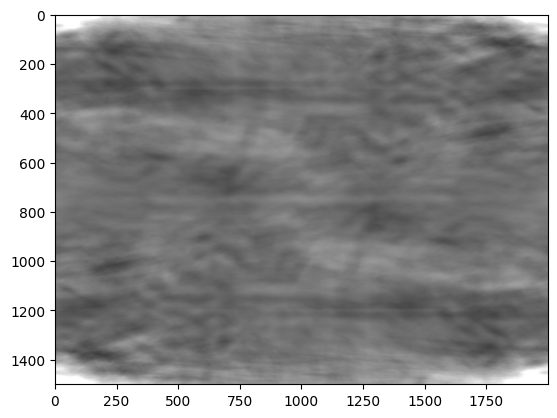

In [28]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

img = Image.open('bird.png').convert('L')
im1 = np.asarray(img)
c = abs(scipy.fftpack.fft2(im1))
d = scipy.fftpack.fftshift(c)
M = d.shape[0]
N = d.shape[1]
H = np.ones((M, N))

center1 = M / 2
center2 = N / 2
d_0 = 30.0
t1 = 1
t2 = 2 * t1

for i in range(1, M):
    for j in range(1, N):
        rl = (i - center1)**2 + (j - center2)**2
        r = math.sqrt(rl)
        if r > d_0:
            H[i, j] = 1/(1 + (r/d_0)**t1)

H = H.astype(float)
H = Image.fromarray(H)
con = d * H
e = abs(scipy.fftpack.ifft2(con))
e = e.astype(float)
im3 = Image.fromarray(e)

img.show()
im3.show()
plt.imshow(im3, cmap='gray')
plt.show()


Butterworth highpass Filter

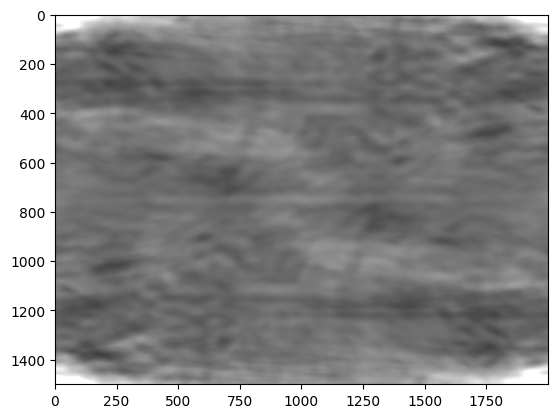

In [29]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

img = Image.open('bird.png').convert('L')
im1 = np.asarray(img)

c = abs(scipy.fftpack.fft2(im1))
d = scipy.fftpack.fftshift(c)

M = d.shape[0]
N = d.shape[1]
H = np.ones((M, N))

center1 = M/2
center2 = N/2
d_0 = 30.0
t1 = 1
t2 = 2 * t1

for i in range(1, M):
    for j in range(1, N):
        r1 = (i - center1)**2 + (j - center2)**2
        r = math.sqrt(r1)
        if r > d_0:
            H[i, j] = 1/(1 + (r/d_0)**t2)

H = H.astype(float)
H = Image.fromarray(H)

con = d * H
e = abs(scipy.fftpack.ifft2(con))
e = e.astype(float)
im3 = Image.fromarray(e)

img.show()
im3.show()
plt.imshow(im3, cmap='gray')
plt.show()

Bài Tập

1. Viết chương trình tạo menu cho phép người dùng chọn các phương pháp biến đổi ảnh như
sau:
- Image inverse transformation
- Gamma-Correction
- Log Transformation
- Histogram equalization
- Contrast Stretching
Khi người dùng ấn phím I, G, L, H, C thì chương trình sẽ thực hiện hàm tương ứng cho các hình trong thư mục exercise. Lưu và hiển thị các ảnh đã biến đổi.

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

input_folder = 'exercise'
output_folder = 'output'
os.makedirs(output_folder, exist_ok=True)

def image_inverse(img):
    return 255 - img

def gamma_correction(img, gamma=2.2):
    normalized = img / 255.0
    corrected = np.power(normalized, 1/gamma)
    return np.uint8(corrected * 255)

def log_transformation(img):
    c = 255 / np.log(1 + np.max(img))
    log_image = c * np.log(1 + img.astype(np.float32))
    return np.uint8(log_image)

def histogram_equalization(img):
    return cv2.equalizeHist(img)

def contrast_stretching(img):
    a, b = np.min(img), np.max(img)
    stretched = (img - a) * (255.0 / (b - a))
    return np.uint8(stretched)

def show_and_save(img, name):
    plt.imshow(img, cmap='gray')
    plt.title(name)
    plt.axis('off')
    plt.show()
    cv2.imwrite(os.path.join(output_folder, name), img)

def process_images(option):
    for filename in os.listdir(input_folder):
        if filename.endswith(('.png', '.jpg', '.jpeg', '.bmp')):
            path = os.path.join(input_folder, filename)
            img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                continue

            if option == 'I':
                out = image_inverse(img)
                name = f'inverse_{filename}'
            elif option == 'G':
                out = gamma_correction(img)
                name = f'gamma_{filename}'
            elif option == 'L':
                out = log_transformation(img)
                name = f'log_{filename}'
            elif option == 'H':
                out = histogram_equalization(img)
                name = f'hist_{filename}'
            elif option == 'C':
                out = contrast_stretching(img)
                name = f'contrast_{filename}'
            else:
                print("Invalid option.")
                return

            show_and_save(out, name)

print("Chọn phương pháp biến đổi ảnh:")
print("I - Image inverse")
print("G - Gamma Correction")
print("L - Log Transformation")
print("H - Histogram Equalization")
print("C - Contrast Stretching")

option = input("Nhập lựa chọn của bạn (I/G/L/H/C): ").upper()
process_images(option)

Chọn phương pháp biến đổi ảnh:
I - Image inverse
G - Gamma Correction
L - Log Transformation
H - Histogram Equalization
C - Contrast Stretching


2. Viết chương trình tạo menu cho phép người dùng chọn các phương pháp biến đổi ảnh như
sau:
- Fast Fourier
- Butterworth Lowpass Filter
- Butterworth Highpass Filter
Khi người dùng ấn phím F, L, H thì chương trình sẽ thực hiện hàm tương ứng cho các hình trong thư mục exercise. Lưu và hiển thị các ảnh đã biến đổi.


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

input_folder = 'exercise'
output_folder = 'output'
os.makedirs(output_folder, exist_ok=True)

def show_and_save(img, name):
    plt.imshow(img, cmap='gray')
    plt.title(name)
    plt.axis('off')
    plt.show()
    cv2.imwrite(os.path.join(output_folder, name), img)

def apply_fft(img):
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude = 20 * np.log(np.abs(fshift) + 1)
    return np.uint8(magnitude / magnitude.max() * 255)

def butterworth_lowpass_filter(img, d0=30, n=2):
    rows, cols = img.shape
    crow, ccol = rows // 2, cols // 2

    u = np.arange(rows)
    v = np.arange(cols)
    U, V = np.meshgrid(u - crow, v - ccol, indexing='ij')
    D = np.sqrt(U**2 + V**2)
    H = 1 / (1 + (D / d0)**(2 * n))

    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    filtered = fshift * H
    img_back = np.fft.ifft2(np.fft.ifftshift(filtered))
    result = np.abs(img_back)
    return np.uint8(result / result.max() * 255)

def butterworth_highpass_filter(img, d0=30, n=2):
    rows, cols = img.shape
    crow, ccol = rows // 2, cols // 2

    u = np.arange(rows)
    v = np.arange(cols)
    U, V = np.meshgrid(u - crow, v - ccol, indexing='ij')
    D = np.sqrt(U**2 + V**2)
    H = 1 / (1 + (d0 / (D + 1e-5))**(2 * n))

    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    filtered = fshift * H
    img_back = np.fft.ifft2(np.fft.ifftshift(filtered))
    result = np.abs(img_back)
    return np.uint8(result / result.max() * 255)

def process_images(option):
    for filename in os.listdir(input_folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
            path = os.path.join(input_folder, filename)
            img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                continue

            if option == 'F':
                out = apply_fft(img)
                name = f'fft_{filename}'
            elif option == 'L':
                out = butterworth_lowpass_filter(img)
                name = f'blpf_{filename}'
            elif option == 'H':
                out = butterworth_highpass_filter(img)
                name = f'bhpf_{filename}'
            else:
                print("Invalid option.")
                return

            show_and_save(out, name)

print("Chọn phương pháp biến đổi ảnh:")
print("F - Fast Fourier Transform")
print("L - Butterworth Lowpass Filter")
print("H - Butterworth Highpass Filter")

option = input("Nhập lựa chọn của bạn (F/L/H): ").upper()
process_images(option)

3. Viết chương trình thay đổi thứ tự màu RGB của ảnh trong thư mục exercise và sử dụng ngẫu nhiên một trong các phép biến đổi ảnh trong câu 1. Lưu và hiển thị ảnh đã biến đổi.

In [ ]:
import cv2
import numpy as np
import os
import random
import matplotlib.pyplot as plt

input_folder = 'exercise'
output_folder = 'output'
os.makedirs(output_folder, exist_ok=True)

def image_inverse(img):
    return 255 - img

def gamma_correction(img, gamma=2.2):
    norm = img / 255.0
    corrected = np.power(norm, gamma)
    return np.uint8(corrected * 255)

def log_transform(img):
    img_float = img.astype(np.float32)
    img_log = np.log1p(img_float)
    img_log = img_log / img_log.max() * 255
    return np.uint8(img_log)

def histogram_equalization(img):
    if len(img.shape) == 3:
        img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
        img_yuv[:, :, 0] = cv2.equalizeHist(img_yuv[:, :, 0])
        return cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)
    else:
        return cv2.equalizeHist(img)

def contrast_stretching(img):
    min_val = np.min(img)
    max_val = np.max(img)
    stretched = (img - min_val) * 255.0 / (max_val - min_val)
    return np.uint8(stretched)

transform_functions = [
    image_inverse,
    gamma_correction,
    log_transform,
    histogram_equalization,
    contrast_stretching
]

def apply_random_rgb_shuffle(img):
    channels = list(cv2.split(img))
    random.shuffle(channels)
    return cv2.merge(channels)

def show_and_save(img, name):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(name)
    plt.axis('off')
    plt.show()
    cv2.imwrite(os.path.join(output_folder, name), img)

for filename in os.listdir(input_folder):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
        path = os.path.join(input_folder, filename)
        img = cv2.imread(path)
        if img is None:
            continue

        shuffled_img = apply_random_rgb_shuffle(img)
        transform = random.choice(transform_functions)
        transformed_img = transform(shuffled_img)
        output_name = f'random_rgb_transformed_{filename}'
        show_and_save(transformed_img, output_name)

4. Viết chương trình thay đổi thứ tự màu RGB của ảnh trong thư mục exercise và sử dụng ngẫu nhiên một trong các phép biến đổi ảnh trong câu 2. Nếu ngẫu nhiên là phép Butterworth
Lowpass thì chọn thêm Min Filter để lọc ảnh. Nếu ngẫu nhiên là phép Butterworth Highpass thì chọn thêm Max Filter để lọc ảnh. Lưu và hiên thị ảnh đã biến đối.

In [ ]:
import cv2
import numpy as np
import os
import random

def butterworth_filter(img, d0, n, highpass=False):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    rows, cols = gray.shape
    crow, ccol = rows // 2, cols // 2

    dft = np.fft.fft2(gray)
    dft_shift = np.fft.fftshift(dft)

    u = np.arange(rows)
    v = np.arange(cols)
    V, U = np.meshgrid(v, u)
    D = np.sqrt((U - crow)**2 + (V - ccol)**2)

    if highpass:
        H = 1 / (1 + (d0 / (D + 1e-5))**(2 * n))
    else:
        H = 1 / (1 + (D / (d0 + 1e-5))**(2 * n))

    filtered = dft_shift * H
    f_ishift = np.fft.ifftshift(filtered)
    img_back = np.abs(np.fft.ifft2(f_ishift))
    return np.uint8(np.clip(img_back, 0, 255))

def min_filter(img): return cv2.erode(img, np.ones((3,3), np.uint8))
def max_filter(img): return cv2.dilate(img, np.ones((3,3), np.uint8))

def fast_fourier(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    f = np.fft.fft2(gray)
    fshift = np.fft.fftshift(f)
    mag = 20 * np.log(np.abs(fshift) + 1)
    return np.uint8(np.clip(mag, 0, 255))

effects = ['fft', 'lowpass', 'highpass']
folder = 'exercise'
os.makedirs('output', exist_ok=True)

for fname in os.listdir(folder):
    if fname.lower().endswith(('.jpg', '.png', '.bmp')):
        path = os.path.join(folder, fname)
        img = cv2.imread(path)
        img = img[:, :, random.sample([0, 1, 2], 3)]

        choice = random.choice(effects)
        if choice == 'fft':
            result = fast_fourier(img)
        elif choice == 'lowpass':
            filtered = butterworth_filter(img, d0=30, n=2, highpass=False)
            result = min_filter(filtered)
        else:
            filtered = butterworth_filter(img, d0=30, n=2, highpass=True)
            result = max_filter(filtered)

        save_path = os.path.join('output', fname)
        cv2.imwrite(save_path, result)
        cv2.imshow('Result', result)
        cv2.waitKey(0)

cv2.destroyAllWindows()